# Python Tutorial
Welcome to Python! In this exercise, we'll walk through some basic functions that will help you with the robotics section of the course. If you're new to the language, be sure to carefully read the comments in each code block and to check out the linked resources.

This tutorial will cover:
- Basic Python
- the Numpy library
- The OpenCV library

For additional information, please check out these (free!) tutorials:
- OpenCV's "[Python for Beginners](https://opencv.org/university/python-for-beginners/?utm_source=opcv&)" Course (estimated 2 hours)
- [Python for Scientific Computing](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb#scrollTo=U1PvreR9L9eW) Tutorial
- Numpy's [Quickstart](https://numpy.org/devdocs/user/quickstart.html)
- OpenCV's "[Bootcamp](https://opencv.org/university/free-opencv-course/?utm_source=opcv&utm_medium=menu&utm_campaign=obc)" Course (estimated 3 hours)
- [OpenCV Tutorial](https://colab.research.google.com/drive/1b-LlTfcJR9lGzilay8z7NHqyD4ItnDsB?usp=sharing#scrollTo=WGb9ad7Lyln8) (contains examples of how to use the library)

### Importing Libraries
This allows us to use code that other people, organizations, or companies have already written. We'll show you how to use some popular libraries in this tutorial.

In [1]:
from google.colab.patches import cv2_imshow
import cv2 as cv    # CV stands for "Computer Vision"
import numpy as np  # numpy stands for "Numerical Python"
import math         # Contains mathematical functions such as log, ceiling/floor, random number generators, etc.

### Basic Python
Python is dynamically-typed; here are some examples of data types you can use.

In [2]:
# Note that variable types do not need to be specifically defined; Python figures it out for you
x = 3               # Integer
y = "Hello World!"  # String
z = True            # Boolean

# Display each of our three types below
print("x: ", x)
print("y: ", y)
print("z: ", z)

# Display the data types
print(type(x))
print(type(y))
print(type(z))

x:  3
y:  Hello World!
z:  True
<class 'int'>
<class 'str'>
<class 'bool'>


Let's now move to lists! These are helpful for storing multiple values (of any data type) in order.

In [3]:
# Lists are also dynamic; they can be resized, and are not limited to a single data type
list_x = [1, 2, 3, 4, 5, "apple", "banana", "pear"]

# List indices start at 0
first_element = list_x[0]
print("First element of the list: ", first_element)

# We can use a built-in function to get the length
length_of_list = len(list_x)
print("Length of the list: ", length_of_list)

# We can access chunks of the list through slicing
middle_four_elements = list_x[2:6]
print("The middle four elements of the list are: ", middle_four_elements)

First element of the list:  1
Length of the list:  8
The middle four elements of the list are:  [3, 4, 5, 'apple']


Sometimes, we write pieces of code that we want to reuse later in the program. In order to do this, we can create a function. We've used functions already - len() is an example that the Python language provides. Let's write our own function!

In [4]:
# Here, we define the function's name ("return_middle_four_elements") and required inputs ("input_list")
def return_middle_four_elements(input_list):
  '''
  In well-documented code, functions will have a header with information about the purpose, expected inputs, and expected outputs. This is helpful to read when debugging!
  Input
    - input_list (Python array): The list to be sliced
  Output
    - middle_four (Python array): A list of length four, which contain the middle four elements of input_list
  '''
  # Any variable created inside this function is locally-scoped - we can only use it here!
  # This variable stores the halfway element. If the length of the list is odd, take the leftmost element
  halfway_index = math.floor(len(input_list)/2)
  middle_four = input_list[halfway_index - 2:halfway_index + 2]

  # Here, we specify what variable should be given back to the program - remember that any variables not explicitly returned will not be accessible later!
  return middle_four

Any variable created inside the function is locally-scoped. However, anything listed in the return statement can be used in the rest of the program. Here, we demonstrate how to use a function and save the results to a new variable.

Troubleshooting Tip: If you run into errors with using functions, be sure to check that the input and output matches what is expected.

In [5]:
# Let's check that our new function works on the example we saw in Cell 4!
list_x_middle_four = return_middle_four_elements(list_x)
print(list_x_middle_four)

[3, 4, 5, 'apple']


In [6]:
# We can also create new lists directly in the input - here's an example of more consolidated code
print(return_middle_four_elements([2, 4, 6, 8, 10, 12]))

[4, 6, 8, 10]


In [7]:
# Notice that we can't use the "middle_four" variable because it only exists inside the "return_middle_four_elements" function
# This cell should produce a NameError
print(middle_four)

NameError: name 'middle_four' is not defined

#### Free-Response Question
Briefly describe the difference between a local and global variable. Refer to [this](https://cs.stanford.edu/people/nick/py/python-function.html) tutorial for more information about functions.


A local variable in Python differs from a global variable in the following ways:

A local variable is one that is defined and accessed exclusively within of a function. It is generated upon calling the function and destroyed upon its completion.

A global variable is one that is accessible throughout a module or file and is defined outside of any specific function. Functions can access global variables, but you must declare them as global within the function in order to make changes to them.

### The Numpy library
Numpy is a popular library for arrays - it optimizes functions such as sorting, arithmetic, and more. Images, which are fundamentally arrays of pixel values, can be manipulated with this library.

First, let's convert a regular Python array to a Numpy array.

Troubleshooting Tip: If the code cell below doesn't run, go back up to the top and be sure to run all the code cells in order. We need to import numpy to use it!

In [8]:
np_array = np.array(list_x)

# Print the new numpy array, and show that the type is now a numpy array
print("New Numpy Array: ", np_array)
print("New Numpy Array Data Type: ", type(np_array))

# Print the old array, and show that the type was a built-in Python list
print("Old Array: ", list_x)
print("Old Array Data Type: ", type(list_x))

New Numpy Array:  ['1' '2' '3' '4' '5' 'apple' 'banana' 'pear']
New Numpy Array Data Type:  <class 'numpy.ndarray'>
Old Array:  [1, 2, 3, 4, 5, 'apple', 'banana', 'pear']
Old Array Data Type:  <class 'list'>


Something interesting happens if we look at the data types closely.

In [9]:
print("Data Type of the First Index: ", type(np_array[0]))
print("Data Type of the Last Index: ", type(np_array[7]))

Data Type of the First Index:  <class 'numpy.str_'>
Data Type of the Last Index:  <class 'numpy.str_'>


When we converted the Python list into a numpy array, the data types were standardized. Now, everything is a string!

#### Code On Your Own Question
This is okay since we aren't doing computations on the np_array, but let's organize a little bit! Can you re-arrange the "np_array" variable so that it's 2-dimensional? The first dimension should be integers only, and the second dimension should be strings only. In other words, the final result should be equivalent to this:


> [['1', '2', '3', '4', '5'], ['apple', 'banana', 'pear']]

You may have to use list slicing, like we saw in Cell 5. Additionally, numpy has many convenient functions, which can be explored in the [documentation](https://numpy.org/doc/stable/user/basics.indexing.html).







In [11]:

int_part = np_array[:5]
str_part = np_array[5:]
two_d_np_array = np.array([int_part, str_part], dtype=object)

print("Re-arranged 2D NumPy Array: \n", two_d_np_array)

Re-arranged 2D NumPy Array: 
 [array(['1', '2', '3', '4', '5'], dtype='<U21')
 array(['apple', 'banana', 'pear'], dtype='<U21')]


As promised, we can also store images in numpy arrays. Let's go over how to upload an image into Colab!
1. Click the file icon on the left
2. Click the file upload button (directly under the word "Files")
3. Choose an image from your computer to upload
4. Rename your image so that it's readable
5. See the final result below (your image may be named differently; this is okay!)

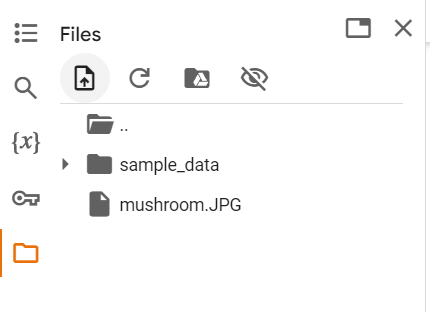

#### Important Note
Every file in Colab deletes itself upon runtime. This means that if you close and reopen the page, you may have to re-upload your files. Be sure that your code is generalizable to all image dimensions - if there is not an available image upon submission, course staff will use a test image to grade your assignment!

### Reading Images into Numpy Arrays
OpenCV, which is built on top of numpy, has a built-in function for this.

In [12]:
# Read the image into a variable using OpenCV
image = cv.imread("cub.jpg")

# Print the data type of the image variable
print("Data Type of image Variable: ", type(image))

Data Type of image Variable:  <class 'numpy.ndarray'>


Let's print the values of the actual numpy array to see what the data looks like!

In [13]:
# Print the values of the numpy array
print(image)

[[[221 147  75]
  [221 147  75]
  [221 147  75]
  ...
  [104  93  61]
  [101  91  57]
  [ 92  82  48]]

 [[221 147  75]
  [221 147  75]
  [221 147  75]
  ...
  [ 90  79  47]
  [ 96  85  53]
  [101  91  57]]

 [[222 148  76]
  [222 148  76]
  [222 148  76]
  ...
  [ 93  83  53]
  [ 92  83  50]
  [ 89  80  47]]

 ...

 [[ 59  53 102]
  [134 131 176]
  [105 105 145]
  ...
  [ 43  90  81]
  [ 38  87  79]
  [ 36  88  78]]

 [[ 69  64 115]
  [130 128 174]
  [107 106 148]
  ...
  [ 51 105  92]
  [ 49 105  94]
  [ 35  94  80]]

 [[ 83  80 130]
  [130 127 176]
  [112 114 155]
  ...
  [ 55 114 100]
  [ 58 117 103]
  [ 44 105  91]]]


That's a lot of values! We can print the dimensions of the array using the .shape attribute. Note that the values are stored in (height, width, pixel) order. This can be verified by checking the properties of the original image (if the image you used is rectangular).

In [14]:
# Print the shape of the image
print("Dimensions: ", image.shape)

# We can access each dimension using brackets - this is just like how we access elements of an array!
image_height = image.shape[0]
image_width = image.shape[1]
image_pixel = image.shape[2]
print("Height: ", image_height)
print("Width: ", image_width)
print("Pixels: ", image_pixel)

Dimensions:  (300, 600, 3)
Height:  300
Width:  600
Pixels:  3


Notice that each pixel has three values - the amounts of blue, green, and red are stored as integers with a value between 0 and 255. Note that the pixel values are, unintuitively, stored in blue/green/red (BGR) order!

Let's now read the image in grayscale!

In [17]:
grayscale_image = cv.imread("cub.jpg", cv.IMREAD_GRAYSCALE)
print("Grayscale Shape: ", grayscale_image.shape)


Grayscale Shape:  (300, 600)


#### Free-Response Question
Notice there is no pixel dimension anymore. Explain why the color image was a 3-dimensional array, but the grayscale image is a 2-dimensional array:

A three-dimensional array containing height, breadth, and three RGB color channels is called a color image. An image with the dimensions (300, 600, 3) comprises three color components (Red, Green, and Blue) and 300 rows and 600 columns. On the other hand, because each pixel in a grayscale image only has one intensity value rather than distinct RGB values, it is a 2D array consisting just of height and width. As a result, without color information, the grayscale image shape (300, 600) merely depicts the height and width.

### The OpenCV Library
OpenCV is one of the most popular computer vision libraries. We will be using it in upcoming assignments for feature detection! Let's further explore the functionality.

Let's start with displaying an image!

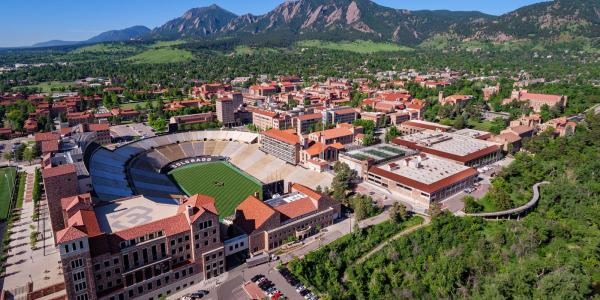

In [18]:
# We've already read in a color image in Cell 17; let's display this to the screen
cv2_imshow(image)

# This prints an error message in case the image was not read properly. It's important to test code along the way!
assert image is not None, "file could not be read, check with os.path.exists()"

This image is very large - by reducing the image size, we can speed up our processing.

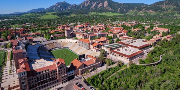

Small Image Dimensions:  (90, 180, 3)


In [19]:
# Resize the image to 30% the original size
new_size = 0.3    # This can be edited to change the size of the resulting image
small_image = cv.resize(image, (0, 0), fx = new_size, fy = new_size)
cv2_imshow(small_image)

# Display the new dimensions - does this line up? The old dimensions were displayed in Cell 49
print("Small Image Dimensions: ", small_image.shape)

We can perform various functions on the image such as rotations, translations, filters, feature detection, object recognition, and more! We'll start with a simple example: rotation.

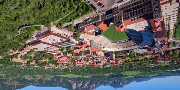

In [20]:
rotated_image = cv.rotate(small_image, cv.ROTATE_180)
cv2_imshow(rotated_image)

#### Code On Your Own Question
Now, we'd like you to explore OpenCV on your own. Pick a function, then implement it in the following code cell. Provide a short explanation of how the function works.

Need ideas? Read the [documentation](https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html) for a list of all available functions.

Chosen Function: cv2.cvtColor()

How does it work: An image can be converted between different color spaces using the cv2.cvtColor() method. The desired color conversion code (such as cv.COLOR_BGR2GRAY for grayscale conversion) and the source image are passed. OpenCV performs the desired transformation internally, for example, combining RGB channels into a single grayscale intensity value.

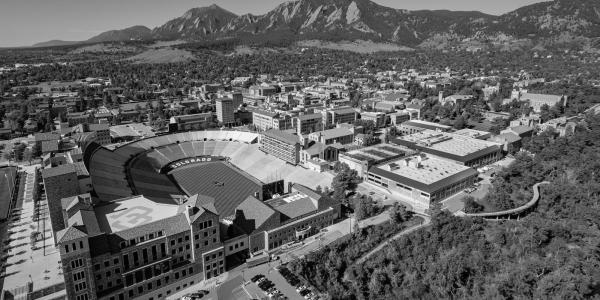

In [21]:
image = cv.imread("cub.jpg")

gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

cv2_imshow(gray_image)

For additional questions, please come to office hours or refer to the tutorials linked at the top of the page. Python will be incredibly useful throughout the rest of your time at CU, and also in careers related to data science, AI, computer vision, and more!